In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import sklearn.metrics as metrics

In [2]:
#import
fl_df=pd.read_csv("C:/Users/Augustin/Desktop/Dorset 23/DIA/Flowers/IRIS_ Flower_Dataset.csv")

In [3]:
print(fl_df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
#get different species
print(species:=fl_df['species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
#transform the species array into a numerical value usable for the model
species_dic={'Iris-setosa':1, 'Iris-versicolor':2,  'Iris-virginica':3}
fl_df['species']=fl_df['species'].map(species_dic)

In [6]:
print(fl_df.head())

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1


In [7]:
print(fl_df['species'].value_counts())

species
1    50
2    50
3    50
Name: count, dtype: int64


In [8]:
fl_df.describe().round(3)

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199,2.000
std,0.828,0.434,1.764,0.763,0.819
min,4.300,2.000,1.000,0.100,1.000
25%,5.100,2.800,1.600,0.300,1.000
50%,5.800,3.000,4.350,1.300,2.000
75%,6.400,3.300,5.100,1.800,3.000
max,7.900,4.400,6.900,2.500,3.000


In [9]:
#are there null values ?
fl_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
#are there duplicated values ?
print(len(fl_df[fl_df.duplicated()]))
print(fl_df[fl_df.duplicated()])

3
     sepal_length  sepal_width  petal_length  petal_width  species
34            4.9          3.1           1.5          0.1        1
37            4.9          3.1           1.5          0.1        1
142           5.8          2.7           5.1          1.9        3


In [11]:
#clean those
fl_df=fl_df.drop_duplicates()

In [12]:
print(fl_df['species'].value_counts())

species
2    50
3    49
1    48
Name: count, dtype: int64


In [13]:
#verify that all values are now usable for the model
print(fl_df.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object


In [14]:
#correlation between each species
fl_df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


C:\Users\Augustin\miniconda3\envs\py38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


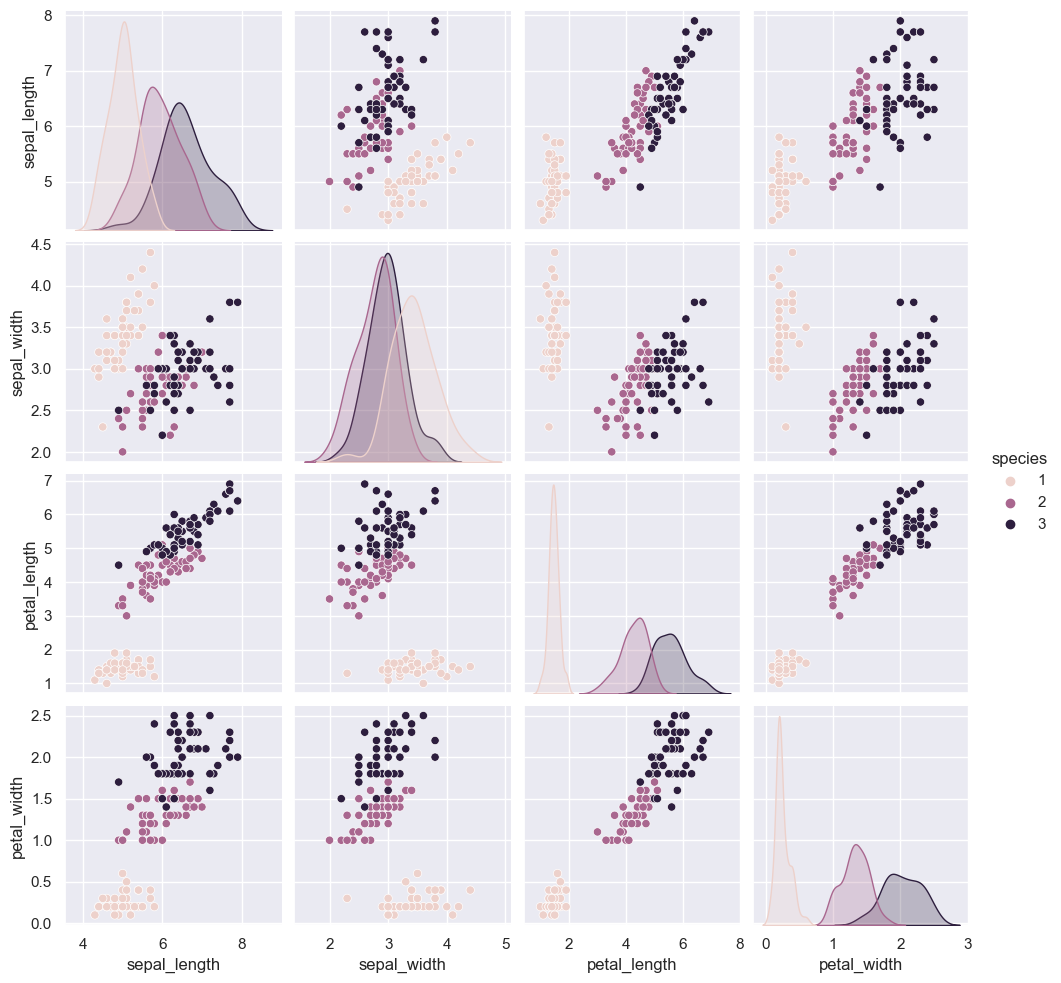

In [15]:
sns.pairplot(fl_df,hue="species")
plt.show()

In [16]:
print(species_dic)

{'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}


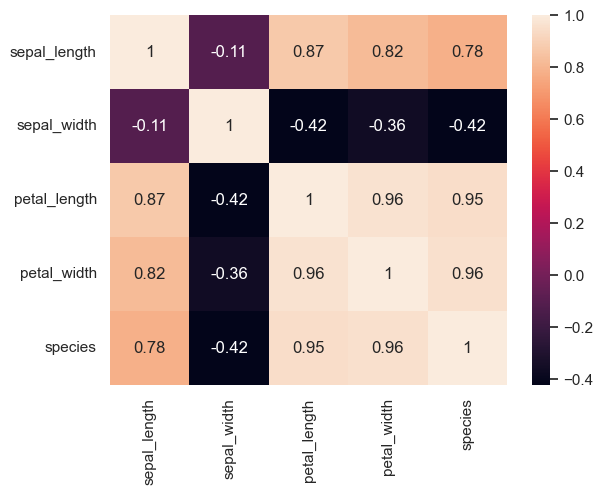

In [17]:
sns.heatmap(fl_df.corr(), annot=True)
plt.show()

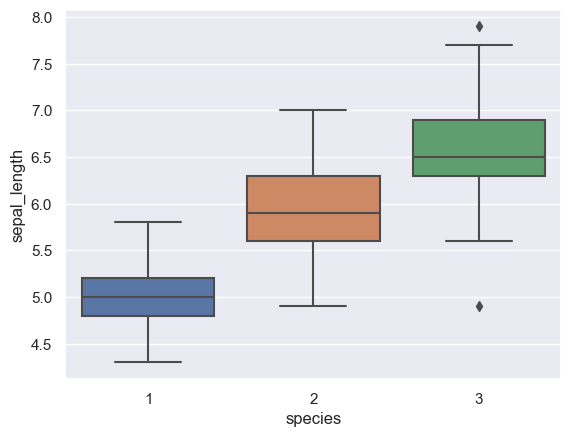

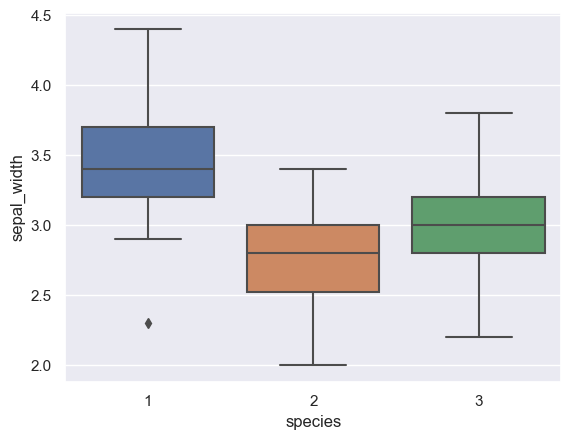

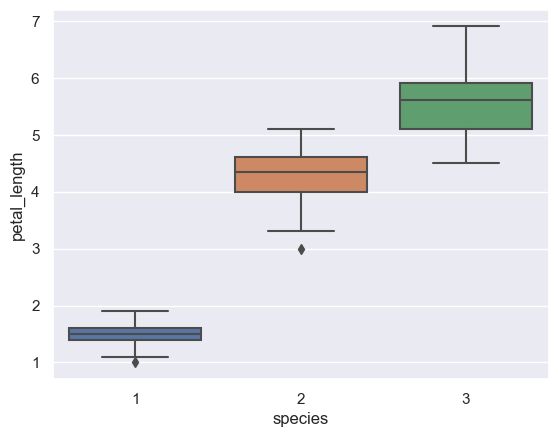

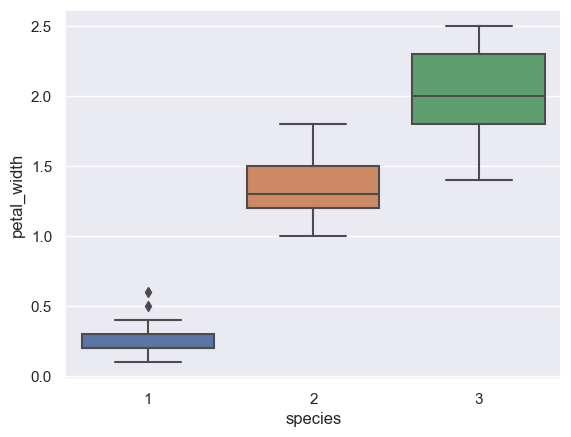

In [18]:
#observe every characterics and their repartition in function of the species
sns.boxplot(x='species', y='sepal_length', data=fl_df)
plt.show()
sns.boxplot(x='species', y='sepal_width', data=fl_df)
plt.show()
sns.boxplot(x='species', y='petal_length', data=fl_df)
plt.show()
sns.boxplot(x='species', y='petal_width', data=fl_df)
plt.show()

C:\Users\Augustin\miniconda3\envs\py38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


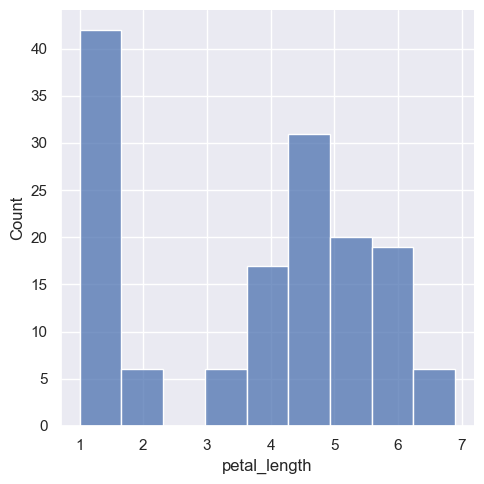

C:\Users\Augustin\miniconda3\envs\py38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


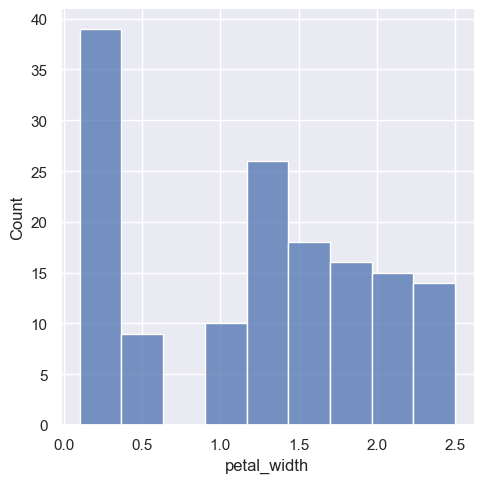

C:\Users\Augustin\miniconda3\envs\py38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


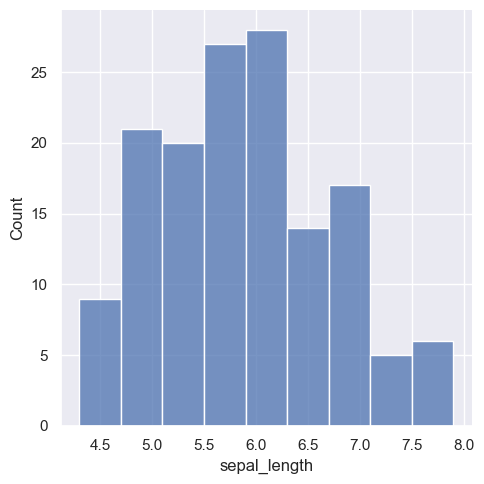

C:\Users\Augustin\miniconda3\envs\py38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


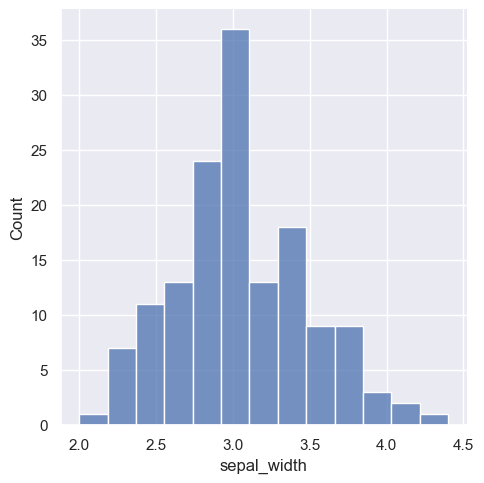

,sepal_length,sepal_width,petal_length,petal_width,species
count,147.000,147.000,147.000,147.000,147.000
mean,5.856,3.056,3.780,1.209,2.007
std,0.829,0.437,1.759,0.758,0.815
min,4.300,2.000,1.000,0.100,1.000
25%,5.100,2.800,1.600,0.300,1.000
50%,5.800,3.000,4.400,1.300,2.000
75%,6.400,3.300,5.100,1.800,3.000
max,7.900,4.400,6.900,2.500,3.000


In [19]:
#repartition in number of every characteristic
sns.displot(fl_df['petal_length'])
plt.show()
sns.displot(fl_df['petal_width'])
plt.show()
sns.displot(fl_df['sepal_length'])
plt.show()
sns.displot(fl_df['sepal_width'])
plt.show()
fl_df.describe().round(3)

C:\Users\Augustin\AppData\Local\Temp\ipykernel_26332\94867400.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


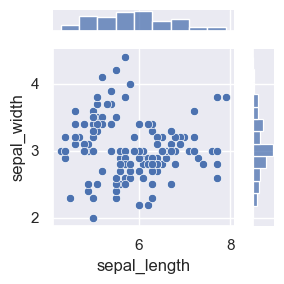

C:\Users\Augustin\AppData\Local\Temp\ipykernel_26332\94867400.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


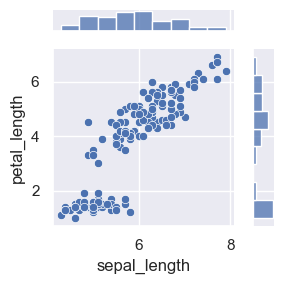

C:\Users\Augustin\AppData\Local\Temp\ipykernel_26332\94867400.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


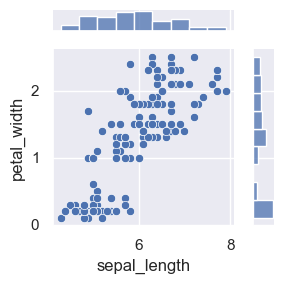

C:\Users\Augustin\AppData\Local\Temp\ipykernel_26332\94867400.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


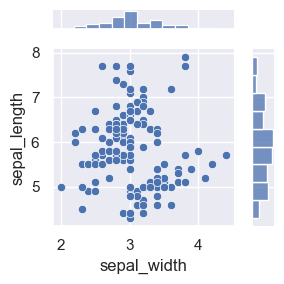

C:\Users\Augustin\AppData\Local\Temp\ipykernel_26332\94867400.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


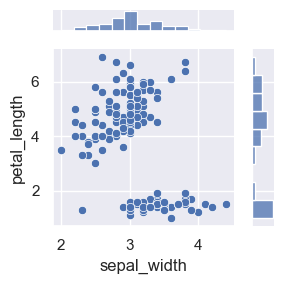

C:\Users\Augustin\AppData\Local\Temp\ipykernel_26332\94867400.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


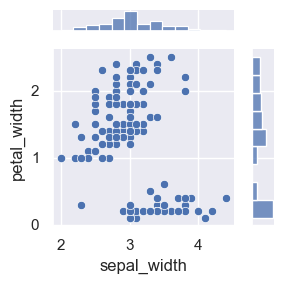

C:\Users\Augustin\AppData\Local\Temp\ipykernel_26332\94867400.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


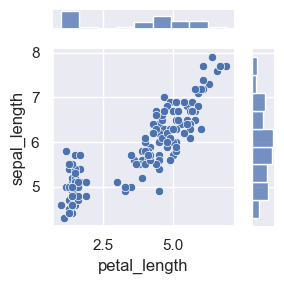

C:\Users\Augustin\AppData\Local\Temp\ipykernel_26332\94867400.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


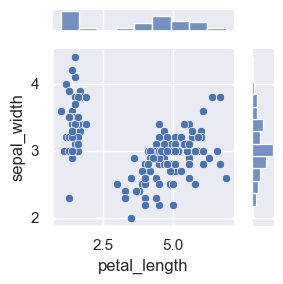

C:\Users\Augustin\AppData\Local\Temp\ipykernel_26332\94867400.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


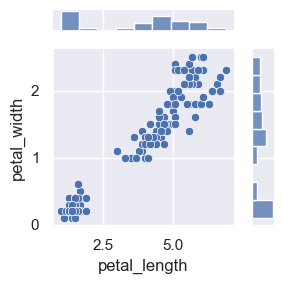

C:\Users\Augustin\AppData\Local\Temp\ipykernel_26332\94867400.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


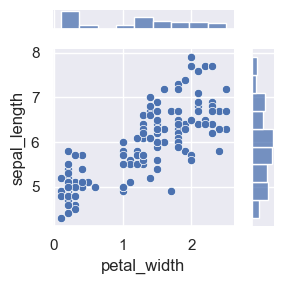

C:\Users\Augustin\AppData\Local\Temp\ipykernel_26332\94867400.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


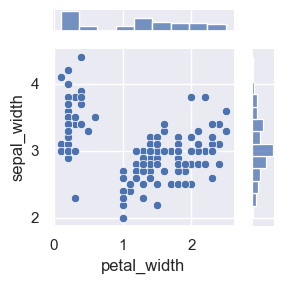

C:\Users\Augustin\AppData\Local\Temp\ipykernel_26332\94867400.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


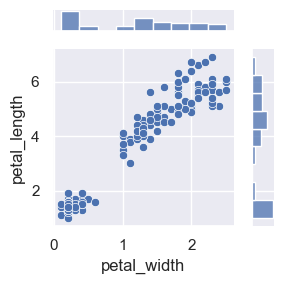

In [20]:
columns_vars=fl_df.columns
columns_vars=columns_vars.drop("species")
for v in columns_vars:
    for v2 in columns_vars:
        if v!=v2:
            sns.jointplot(x=v, y=v2, data=fl_df, height = 3)
            plt.tight_layout()
            plt.show()

In [21]:
#create two sets to train and then test the svm model and the random forest model
fl_train, fl_test = train_test_split(fl_df, test_size = 0.2)
print(fl_train.shape)
print(fl_test.shape)

(117, 5)
(30, 5)


In [22]:
#separate each set (train & test) in a X and a y set
X_train= fl_train[fl_df.columns.drop('species').tolist()] 
y_train=fl_train.species                                                            
X_test= fl_test[fl_df.columns.drop('species').tolist()]  
y_test=fl_test.species    

In [23]:
#standardisation, not changing a lot for random forest but better for svm
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
from sklearn import svm
model=svm.SVC()

In [25]:
#create a prediction after having trained the model
model.fit(X_train, y_train)
pred=model.predict(X_test)
#mesure the accuracy of the model thanks to the prediction and the exact data
score=metrics.accuracy_score(pred, y_test)
print(score)

0.9666666666666667


In [26]:
#more precise evaluation of the svm model
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      0.92      0.96        12
           3       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



[[ 6  0  0]
 [ 0 11  1]
 [ 0  0 12]]


Text(0.5, 1.0, 'Confusion Matrix')

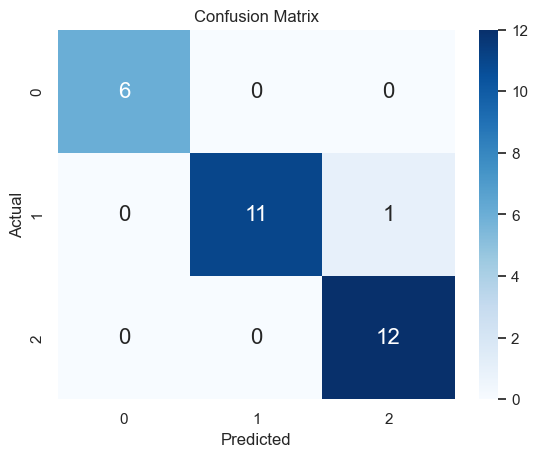

In [27]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [28]:
#random forest to compare efficiency
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=42)
model_2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [32]:
pred_2=model_2.predict(X_test)
conf_matrix_2=confusion_matrix(y_test, pred_2)
score2=metrics.accuracy_score(pred_2, y_test)
print(score)
print(score2)

0.9666666666666667
1.0


In [33]:
print(classification_report(y_test, pred))
print(classification_report(y_test, pred_2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      0.92      0.96        12
           3       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Confusion Matrix')

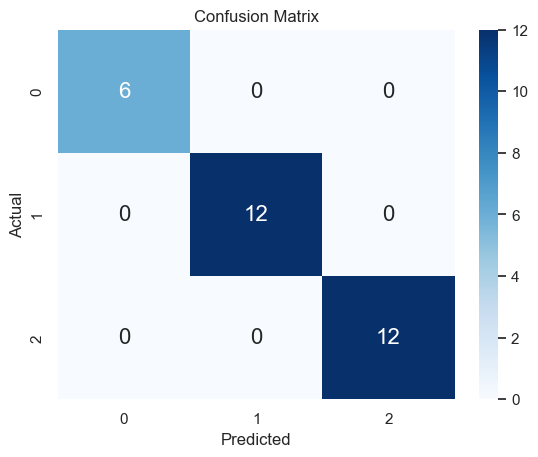

In [34]:
sns.heatmap(conf_matrix_2, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')